# Exercise 08 : Seaborn

- analyze only the users and not the admins
- take into account only logs from the table checker where the status is ready
- you can choose the palette that you enjoy
- the linewidth should be 3
- the background of the graph is gray
- the height should be 10, and the width should 1.5x in relation to the height
- the fontsize of the title should be 30
- the fontsize of the axises labels is 15

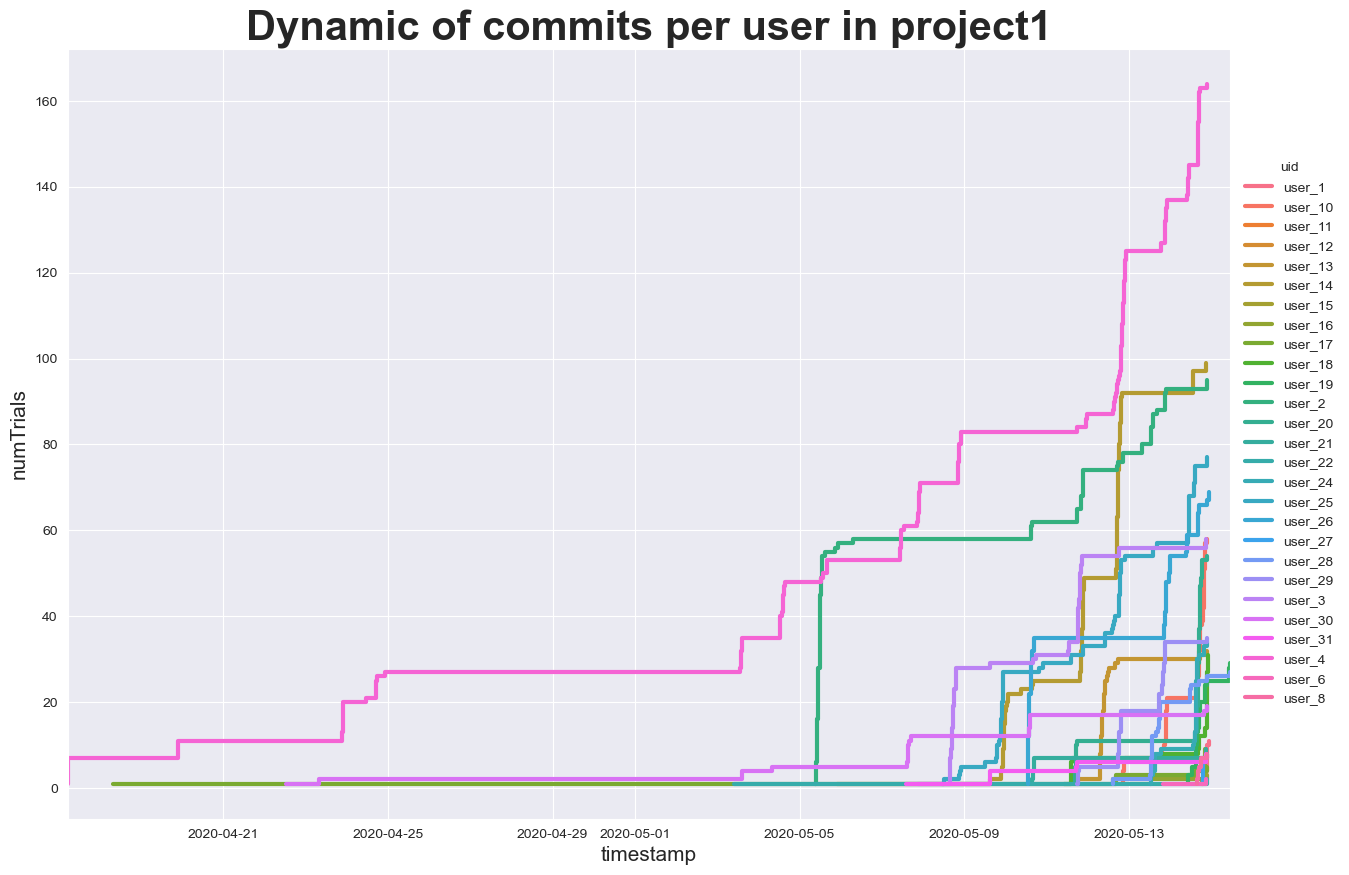

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

con = sqlite3.connect('../data/logs.db')
cursor = con.cursor()
cursor.execute("ATTACH DATABASE '../data/checking-logs.sqlite' AS logs")
con.commit()
query = """
SELECT *
FROM checker
WHERE uid LIKE 'user_%'
AND status = 'ready'
AND labname = 'project1';
"""
df = pd.io.sql.read_sql(query, con)
con.close()

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(["uid", "timestamp"])

df['numTrials'] = 1 
df['cumulative_commits'] = df.groupby('uid')['numTrials'].cumsum()

user_order = df['uid'].unique()
user_order.sort()
df['uid'] = pd.Categorical(df['uid'], categories=user_order, ordered=True)

sns.set_style("darkgrid")


plt.figure(figsize=(15, 10))

palette = sns.color_palette("husl", n_colors=len(user_order))  

sns.lineplot(
    x='timestamp', 
    y='cumulative_commits', 
    hue='uid', 
    data=df, 
    linewidth=3, 
    drawstyle='steps-post',
    palette=palette,
    estimator=None
)

plt.xlabel("timestamp", fontsize=15)
plt.ylabel("numTrials", fontsize=15)
plt.title("Dynamic of commits per user in project1", fontsize=30, fontweight='bold')

plt.legend(title="uid", bbox_to_anchor=(1.1, 0.5), loc="right", fontsize=10, frameon=False)
plt.xlim(df['timestamp'].min(), df['timestamp'].max())
plt.show()


### Which user was the leader in the number of commits almost all of the time?” The answer: user_*.

user_4

### Which user was the leader for only a short period of time?” The answer: user_*.

user_2